In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [55]:
# Importing Boston Data set
from sklearn.datasets import load_boston
boston = load_boston()

In [56]:
# The object boston is a dictionary, so you can explore the keys of this dictionary.
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [57]:
# Getting the size of the dataset
boston.data.shape

(506, 13)

In [58]:
# Printing the feature names of the Boston data set
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [60]:
# Seeing the description of this dataset to know more abount it
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [61]:
# Converting the Boston Dataset to Pandas Dataframe
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
# Replacing the row numbers with feature names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
# boson.target contains the housing prices
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [64]:
# Adding these target prices to the bos data frame
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
# Importing linear regression from sci-kit learn module and storing the linear regression object in a variable 'lm'
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a Linear Regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Fitting a liner model
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Printing the intercept coefficient
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.491103280363404


In [68]:
# Printing the no. of coefficients
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [53]:
zipped = zip(X, lm.coef_)
m = list(zipped)
m

[('CRIM', -0.10717055656035501),
 ('ZN', 0.04639521952980191),
 ('INDUS', 0.0208602395321751),
 ('CHAS', 2.688561399317955),
 ('NOX', -17.79575866030916),
 ('RM', 3.8047524602580123),
 ('AGE', 0.0007510617033263944),
 ('DIS', -1.4757587965198167),
 ('RAD', 0.3056550383391),
 ('TAX', -0.01232934630527538),
 ('PTRATIO', -0.9534635546905618),
 ('B', 0.009392512722188329),
 ('LSTAT', -0.5254666329007911)]

In [54]:
#Let us construct a dataframe that contains features and estimated coefficients
df1 = pd.DataFrame(data=m, index=None, columns = ['features', 'estimatedCoefficients'])
df1

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


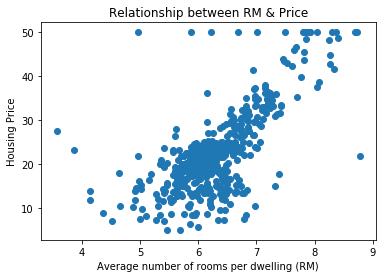

In [69]:
# Plotting a scatter plot between True housing prices and True RM
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM & Price")
plt.show()

In [70]:
# Predicting prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Prices vs Predicted Prices : $Y_i$ vs $\\hat{Y}_i$')

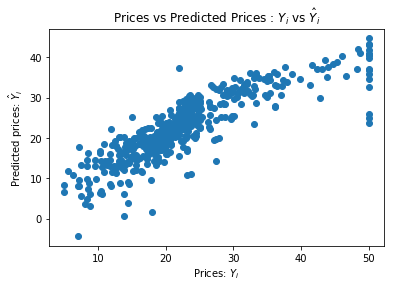

In [71]:
#Plotting a Scatter plot to compare true prices and the predicted prices

plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$")

In [72]:
# Calculating mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print (mseFull)

21.897779217687486


In [73]:
# Lets take the feature 'PTRATIO' and calculate the MSE
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
# Calculating MSE
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print (msePTRATIO)

62.65220001376927


In [75]:
# Doing the train-test split
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


C:\Users\skhaldar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
# Building a linear regression model using train-test data sets
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [78]:
# Printing the MSEs

print("Fit a model X_train and calculate MSE with Y_train:",np.mean((Y_train-lm.predict(X_train))**2))
print("Fit a model X_train and calculate MSE with X_test, Y_test:",np.mean((Y_test-lm.predict(X_test))**2))

Fit a model X_train and calculate MSE with Y_train: 19.54675847353466
Fit a model X_train and calculate MSE with X_test, Y_test: 28.541367275619013


Text(0,0.5,'Residuals')

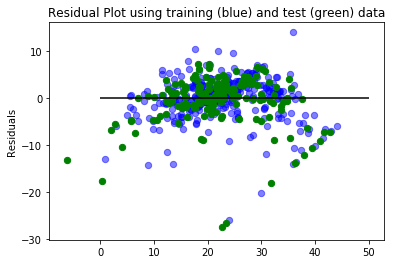

In [79]:
# Analyzing the Residual Plots
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')